In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 

In [2]:
ds=pd.read_csv('Ads_CTR_Optimisation.csv')
ds.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


# IMPLIMENTING THE UCB

In [5]:
N=10000
d=10
no_of_selections=[0]*d
sum_of_rewards=[0]*d
ads_selected = []
total_rewards=0

for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    for i in  range(0,d):
        if (no_of_selections[i]>0):
            avg_reward = sum_of_rewards[i]/no_of_selections[i]
            delta_i = math.sqrt(3/4 * math.log(n+1)/no_of_selections[i])
            upper_bound = avg_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound 
            ad = i
    ads_selected.append(ad)
    no_of_selections[ad]+=1
    reward = ds.values[n,ad]
    sum_of_rewards[ad] += reward
    total_rewards += reward

In [7]:
total_rewards


2395

In [8]:
no_of_selections

[483, 208, 132, 184, 7536, 78, 184, 884, 208, 103]

In [10]:
sum_of_rewards

[86, 24, 9, 19, 2025, 0, 19, 185, 24, 4]

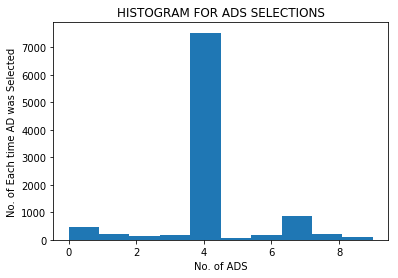

In [12]:
plt.hist(ads_selected)
plt.title('HISTOGRAM FOR ADS SELECTIONS')
plt.xlabel('No. of ADS')
plt.ylabel('No. of Each time AD was Selected')
plt.show()